**Part 1: Markov Chain Weather Forecast**

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the transition matrix
transition_matrix = np.array([
    [0.9, 0.1],  # P(clear|clear), P(cloudy|clear)
    [0.5, 0.5]   # P(clear|cloudy), P(cloudy|cloudy)
])

# Initial state (0: clear, 1: cloudy)
initial_state = 1  # starting with a cloudy day

# Number of days to simulate
N = 10000

# Simulate the Markov Chain
states = [initial_state]
for _ in range(N - 1):
    current_state = states[-1]
    next_state = np.random.choice([0, 1], p=transition_matrix[current_state])
    states.append(next_state)

states = np.array(states)

# Calculate the fraction of sunny days over time
sunny_fraction = np.cumsum(states == 0) / np.arange(1, N + 1)



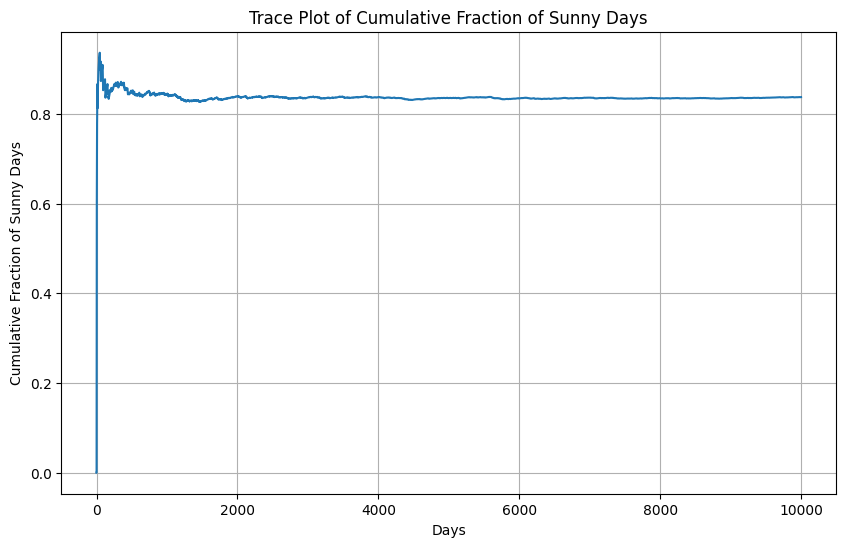

In [8]:
# Plot the trace plot
plt.figure(figsize=(10, 6))
plt.plot(sunny_fraction)
plt.title('Trace Plot of Cumulative Fraction of Sunny Days')
plt.xlabel('Days')
plt.ylabel('Cumulative Fraction of Sunny Days')
plt.grid(True)
plt.show()



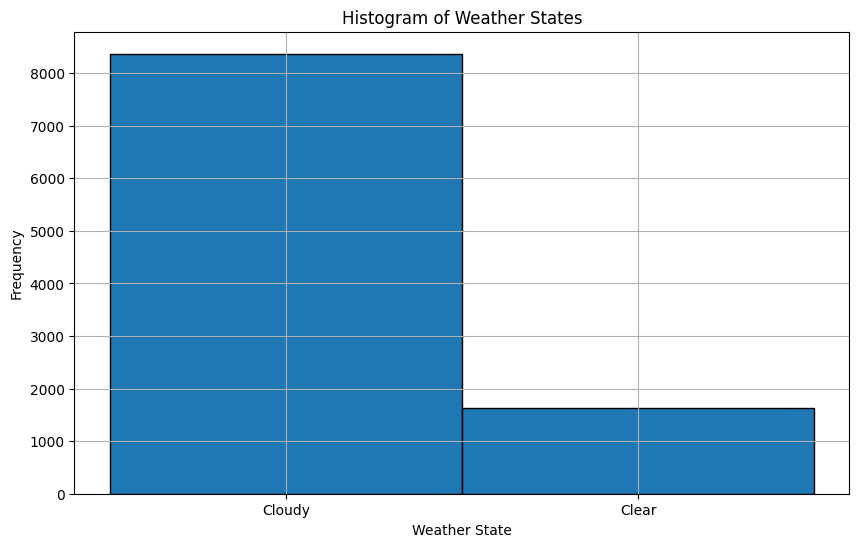

Most likely state: Clear
Error estimate: 0.0037


In [9]:
# Plot the histogram of P(clear)
plt.figure(figsize=(10, 6))
plt.hist(states.astype(int), bins=2, edgecolor='k', align='mid')
plt.xticks([0.25, 0.75], ['Cloudy', 'Clear'])
plt.title('Histogram of Weather States')
plt.xlabel('Weather State')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Summary statistics
most_likely_state = 'Clear' if np.mean(states == 0) > 0.5 else 'Cloudy'
error_estimate = np.std(states == 0) / np.sqrt(N)

print(f"Most likely state: {most_likely_state}")
print(f"Error estimate: {error_estimate:.4f}")

# Burn-in analysis


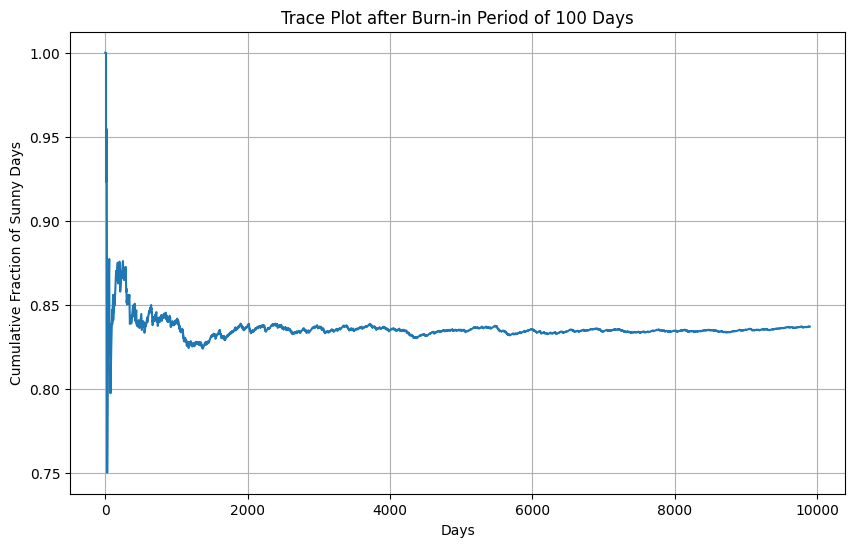

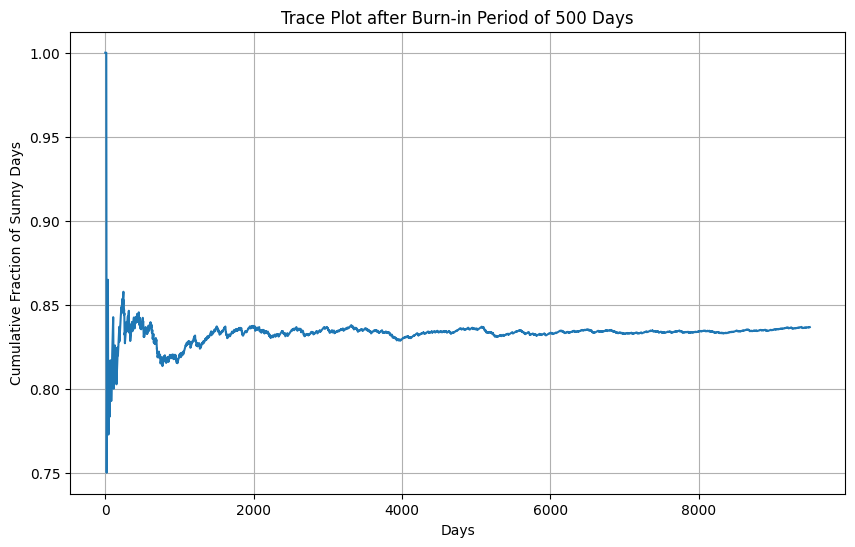

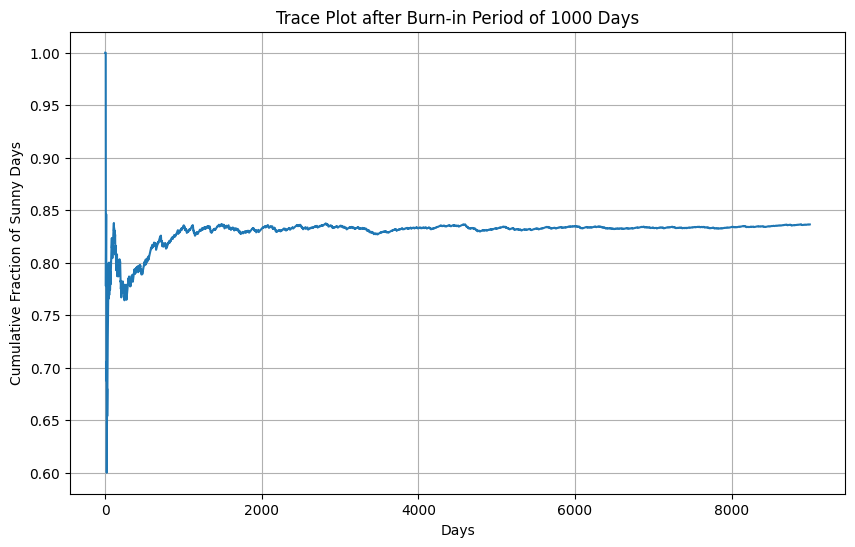

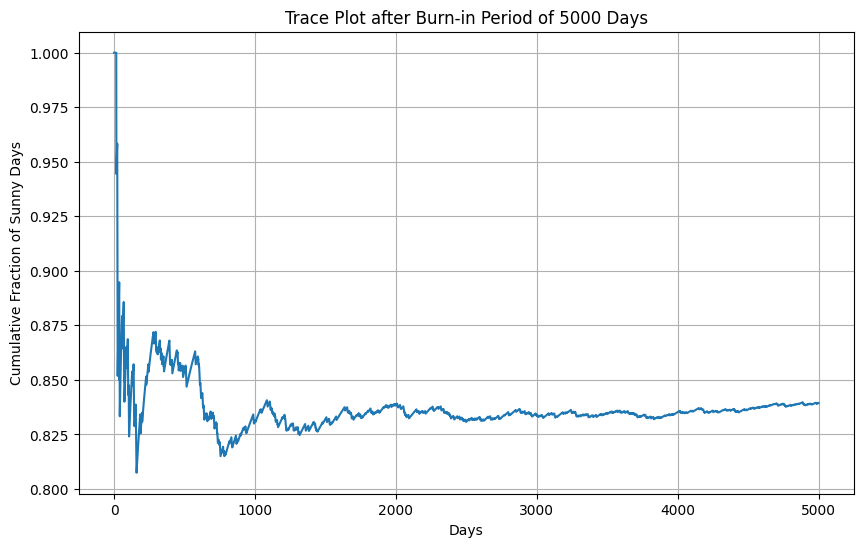

In [10]:
burn_in_periods = [100, 500, 1000, 5000]
for burn_in in burn_in_periods:
    adjusted_sunny_fraction = np.cumsum(states[burn_in:] == 0) / np.arange(1, N - burn_in + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(adjusted_sunny_fraction)
    plt.title(f'Trace Plot after Burn-in Period of {burn_in} Days')
    plt.xlabel('Days')
    plt.ylabel('Cumulative Fraction of Sunny Days')
    plt.grid(True)
    plt.show()


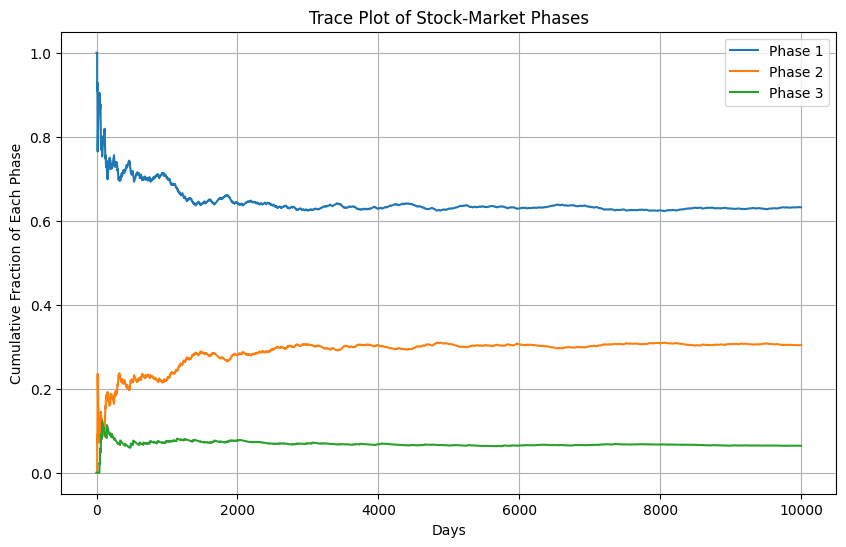

In [13]:
# Stock-market diagram with three phases
three_phase_matrix = np.array([
    [0.9, 0.075, 0.025],  # P(phase1|phase1), P(phase2|phase1), P(phase3|phase1)
    [0.15, 0.8, 0.05],    # P(phase1|phase2), P(phase2|phase2), P(phase3|phase2)
    [0.25, 0.25, 0.5]     # P(phase1|phase3), P(phase2|phase3), P(phase3|phase3)
])

# Simulate the Markov Chain for stock-market phases
initial_phase = 0  # starting with phase 1
phases = [initial_phase]
for _ in range(N - 1):
    current_phase = phases[-1]
    next_phase = np.random.choice([0, 1, 2], p=three_phase_matrix[current_phase])
    phases.append(next_phase)

phases = np.array(phases)

# Calculate the fraction of time in each phase over time
phase1_fraction = np.cumsum(phases == 0) / np.arange(1, N + 1)
phase2_fraction = np.cumsum(phases == 1) / np.arange(1, N + 1)
phase3_fraction = np.cumsum(phases == 2) / np.arange(1, N + 1)

# Plot the trace plots for stock-market phases
plt.figure(figsize=(10, 6))
plt.plot(phase1_fraction, label='Phase 1')
plt.plot(phase2_fraction, label='Phase 2')
plt.plot(phase3_fraction, label='Phase 3')
plt.title('Trace Plot of Stock-Market Phases')
plt.xlabel('Days')
plt.ylabel('Cumulative Fraction of Each Phase')
plt.legend()
plt.grid(True)
plt.show()


**Part 2: Volume of Spheres in Higher Dimensions**


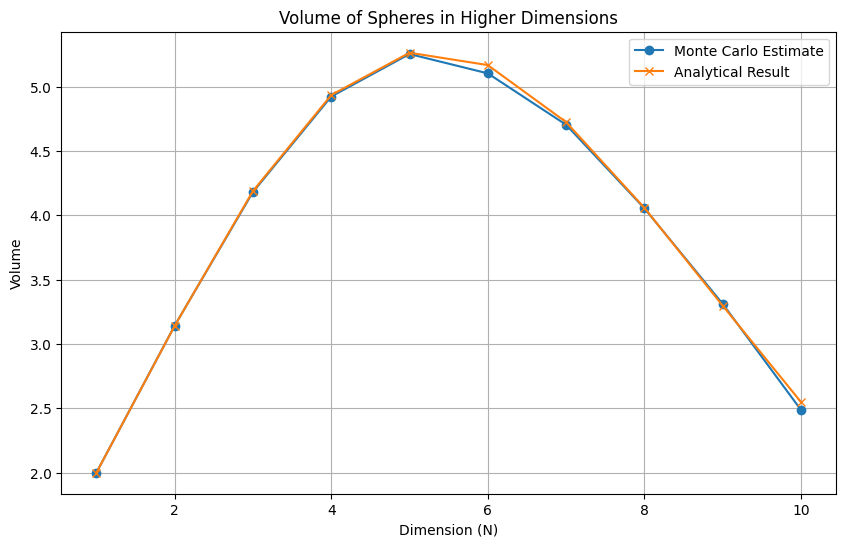

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

def monte_carlo_volume_sphere(n, num_samples=100000):
    points = np.random.uniform(-1, 1, (num_samples, n))
    inside_sphere = np.sum(np.sum(points**2, axis=1) <= 1)
    volume_estimate = (inside_sphere / num_samples) * (2**n)
    return volume_estimate

def analytical_volume_sphere(n):
    return (np.pi**(n/2)) / gamma((n/2) + 1)

# Define the range of dimensions
dimensions = range(1, 11)
volumes = [monte_carlo_volume_sphere(n) for n in dimensions]
analytical_volumes = [analytical_volume_sphere(n) for n in dimensions]

# Plot the estimated volumes
plt.figure(figsize=(10, 6))
plt.plot(dimensions, volumes, marker='o', label='Monte Carlo Estimate')
plt.plot(dimensions, analytical_volumes, marker='x', label='Analytical Result')
plt.title('Volume of Spheres in Higher Dimensions')
plt.xlabel('Dimension (N)')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()



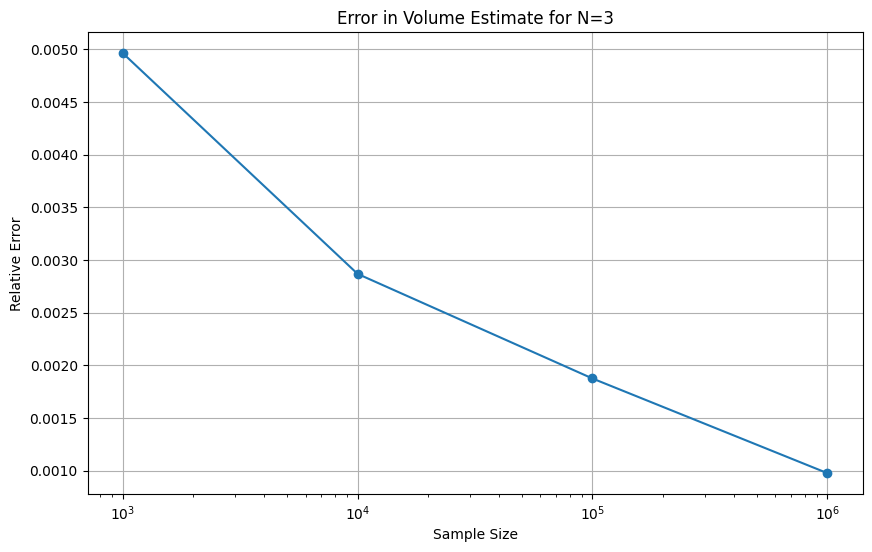

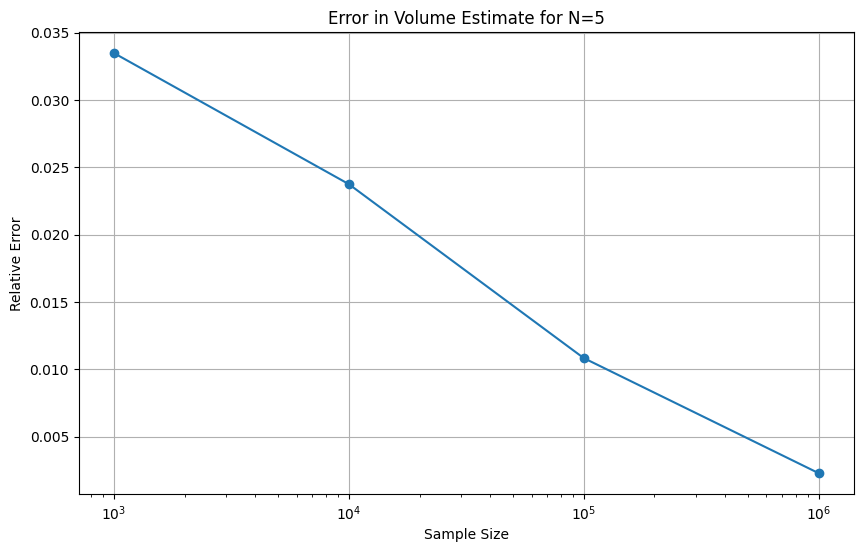

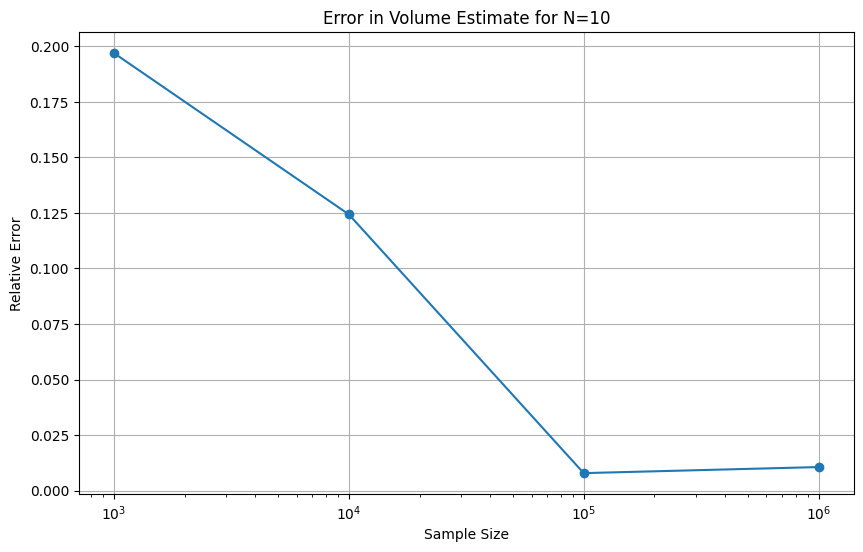

In [12]:
# Exploring the effect of increasing N on accuracy
sample_sizes = [10**3, 10**4, 10**5, 10**6]
for n in [3, 5, 10]:
    errors = []
    for size in sample_sizes:
        mc_volume = monte_carlo_volume_sphere(n, num_samples=size)
        analytical_volume = analytical_volume_sphere(n)
        error = abs(mc_volume - analytical_volume) / analytical_volume
        errors.append(error)
    plt.figure(figsize=(10, 6))
    plt.plot(sample_sizes, errors, marker='o')
    plt.title(f'Error in Volume Estimate for N={n}')
    plt.xlabel('Sample Size')
    plt.ylabel('Relative Error')
    plt.xscale('log')
    plt.grid(True)
    plt.show()


Effect of Increasing Sample Size on Accuracy
The plots show the relative error in the Monte Carlo volume estimates for different dimensions (3, 5, and 10) as the sample size increases.

Insights:

Error Reduction with Sample Size:

In all three plots, the relative error decreases as the sample size increases.
This demonstrates the principle that larger sample sizes yield more accurate Monte Carlo estimates.
Dimension-Specific Trends:

For dimension
𝑁
=
3
, the error decreases significantly with increasing sample size and stabilizes at a lower error level.
For dimension
𝑁
=
5
, the error also decreases, but the initial error is higher compared to
𝑁
=
3
.
For dimension
𝑁
=
10
, the initial error is the highest, and while the error decreases with sample size, it remains slightly higher compared to lower dimensions.
Logarithmic Scale:

The x-axis is on a logarithmic scale, showing the significant impact of increasing the sample size from
1
0
^3

  to
1
0
^6
 .
This scale helps illustrate the rapid improvement in accuracy with larger sample sizes, especially in higher dimensions.
Conclusion:
The analysis confirms that increasing the sample size in Monte Carlo simulations reduces the relative error, leading to more accurate estimates. The effect is more pronounced in lower dimensions, but the principle holds across all tested dimensions.

Giulia's final comment: ok!